In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
classified= pd.read_csv("resources/ClassifiedData.xlsx")

In [5]:
classified.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## SCALE 

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaled_data = StandardScaler()

In [9]:
scaled_data.fit(classified.drop("TARGET CLASS", axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_features = scaled_data.transform(classified.drop("TARGET CLASS", axis = 1))

In [11]:
features_dataframe = pd.DataFrame(scaled_features, columns=classified.columns[:-1])

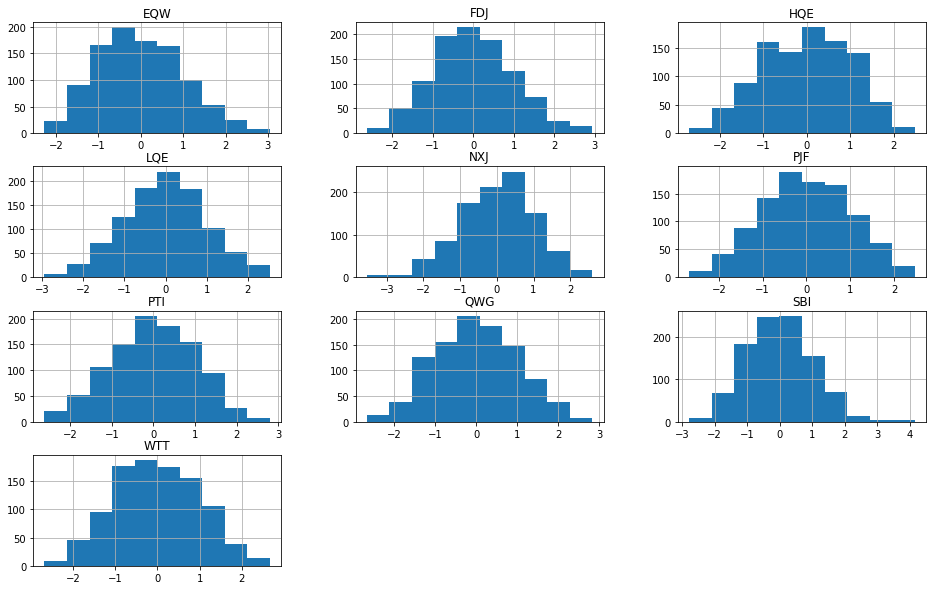

In [16]:
features_dataframe.hist(figsize= (16,10));

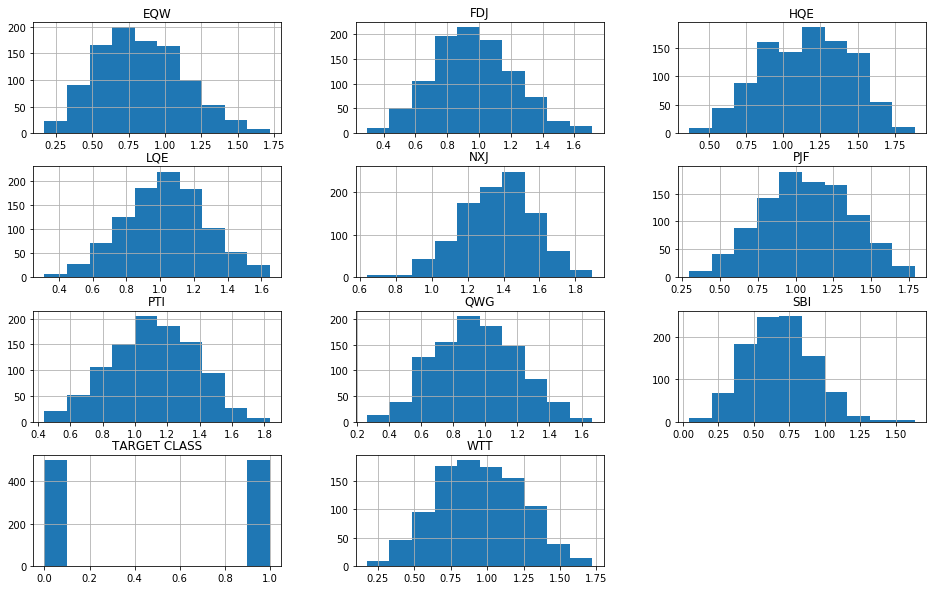

In [20]:
classified.hist(figsize =(16,10));

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
X = features_dataframe
y = classified["TARGET CLASS"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [24]:
kn = KNeighborsClassifier()

In [25]:
kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [26]:
predict = kn.predict(X_test)

In [27]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       159
           1       0.96      0.91      0.94       141

   micro avg       0.94      0.94      0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [28]:
print(confusion_matrix(y_test,predict))

[[154   5]
 [ 12 129]]


## improve with the elbow method

In [31]:
error_rate = []
for i in range(1,40):
    kk = KNeighborsClassifier(n_neighbors=i)
    kk.fit(X_train, y_train)
    pre = kk.predict(X_test)
    error_rate.append(np.mean(y_test != pre))

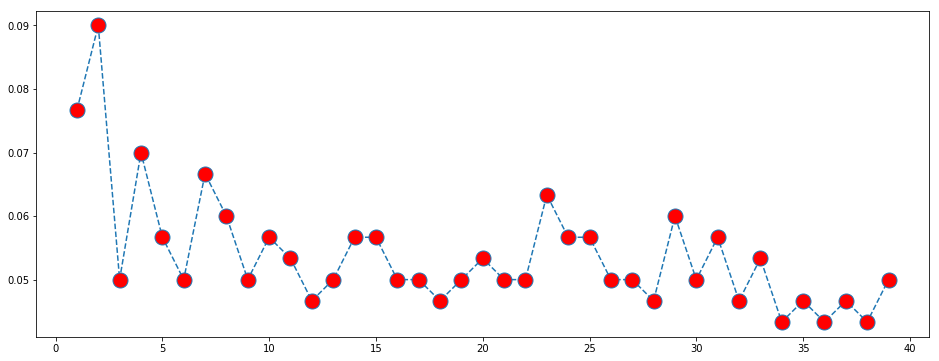

In [36]:
plt.figure(figsize=(16,6))
plt.plot(range(1,40), error_rate, ls = "--", marker = "o", mfc = "r", ms = "15")

## looks like K = 34 would reduce the error

In [41]:
kkk = KNeighborsClassifier(n_neighbors=34)
kkk.fit(X_train,y_train)
prr = kkk.predict(X_test)

In [42]:
print(classification_report(y_test,prr))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.96      0.95      0.95       141

   micro avg       0.96      0.96      0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [43]:
print(confusion_matrix(y_test, prr))

[[153   6]
 [  7 134]]
